In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time

IMAGE_SIDE = 400

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from google.colab import files
files.upload()
#upload losses.py, model_wrapper.py, models.py and utils.py

Saving losses.py to losses.py
Saving model_wrapper.py to model_wrapper.py
Saving models.py to models.py
Saving utils.py to utils.py


{'losses.py': b"import tensorflow.keras.backend as K\r\n\r\n#custom losses\r\n\r\ndef soft_dice_loss(y_true, y_pred, smooth = 1):\r\n    y_true_f = K.flatten(y_true)\r\n    y_pred_f = K.flatten(y_pred)\r\n    intersection = K.sum(y_true_f * y_pred_f)\r\n    union_approx = K.sum(y_true_f) + K.sum(y_pred_f)\r\n    inters_oer_union_approx = (2 * intersection + smooth) / (union_approx + smooth)\r\n    return 1 -  inters_oer_union_approx\r\n\r\n\r\ndef weighted_binary_crossentropy(y_true, y_pred, weight=4):\r\n    '''\r\n    weight: int\r\n        weight to be set to road labels while retaining 1 weight for non-road labels\r\n    '''\r\n    weights = y_true * (weight-1) + 1\r\n    weighted_bce = K.binary_crossentropy(y_true, y_pred) * weights\r\n    return K.mean(weighted_bce)\r\n\r\n\r\ndef total_variation(image, norm='l2'):\r\n    x_diff = K.abs(image[:,1:,:,:] - image[:,:-1,:,:])\r\n    y_diff = K.abs(image[:,:,1:,:] - image[:,:,:-1,:])\r\n    res = None\r\n    if norm == 'l1':\r\n      

In [4]:
from utils import *
from losses import *
from models import *
from model_wrapper import *

In [5]:
x_train, y_train = load_train_data()
y_train = transform_labels(y_train)
x_train, y_train, x_test, y_test = train_test_split(x_train, y_train, validation_ratio=0.2, shuffle=False)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(80, 400, 400, 3)
(80, 400, 400, 1)
(20, 400, 400, 3)
(20, 400, 400, 1)


In [6]:
NUM_EPOCHS = 1 #test on 1 and then reset to 300

Model 1

In [7]:
params = {}
params['input_side'] = 128
params['image_side'] = IMAGE_SIDE
params['num_blocks'] = 4
params['activation_'] = 'elu'
params['regularizer_'] = None
params['starting_num_channels'] = 16
params['metrics'] = [F1_score]
params['metrics_names'] = ['loss', 'F1_score']
params['batch_size'] = 16
params['batches_per_epoch'] = 200
params['reg_name'] = None
params['lambd'] = 0
params['loss'] = weighted_binary_crossentropy
params['main_metric_fn'] = F1_score
params['optimizer'] = tf.keras.optimizers.Adam()
params['path'] = '/saved models/bce_4_128_1' #Need to change? #bce = binary crossentropy, 4 = num_blocks, 128 = input_side, 1 - version

In [8]:
model_bce_4_128_1 = get_Unet_model(params)
model_wrapper_bce_4_128_1 = ModelWrapper(model_bce_4_128_1, params)

model_wrapper_bce_4_128_1.train(x_train, y_train, x_test, y_test, epochs=NUM_EPOCHS)

Epoch: 0001: loss_train: 0.74617, F1_score_train: 0.56880, loss_test: 1.34360, F1_score_test: 0.39829, Full_img_F1_score: 0.37869, 


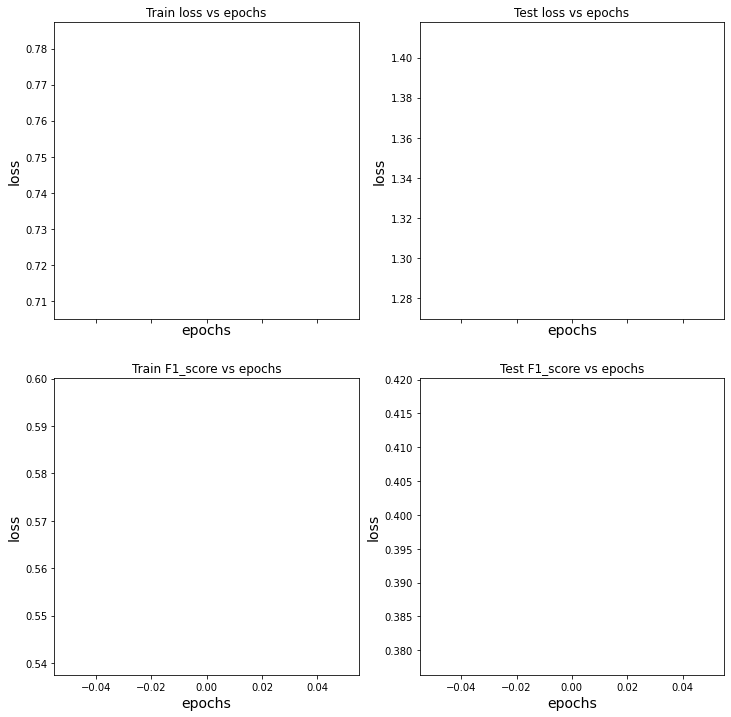

In [9]:
model_wrapper_bce_4_128_1.draw_metrics()

Model 2

In [10]:
params = {}
params['input_side'] = 128
params['image_side'] = IMAGE_SIDE
params['num_blocks'] = 6
params['activation_'] = 'elu'
params['regularizer_'] = None
params['starting_num_channels'] = 16
params['metrics'] = [F1_score]
params['metrics_names'] = ['loss', 'F1_score']
params['batch_size'] = 16
params['batches_per_epoch'] = 200
params['reg_name'] = None
params['lambd'] = 0
params['loss'] = weighted_binary_crossentropy
params['main_metric_fn'] = F1_score
params['optimizer'] = tf.keras.optimizers.Adam()
params['path'] = '/saved models/bce_6_128_1' #Need to change? #bce = binary crossentropy, 6 = num_blocks, 128 = input_side, 1 - version

In [11]:
model_bce_6_128_1 = get_Unet_model(params)
model_wrapper_bce_6_128_1 = ModelWrapper(model_bce_6_128_1, params)

model_wrapper_bce_6_128_1.train(x_train, y_train, x_test, y_test, epochs=NUM_EPOCHS)

Epoch: 0001: loss_train: 0.73502, F1_score_train: 0.57584, loss_test: 3.71593, F1_score_test: 0.34222, Full_img_F1_score: 0.34283, 


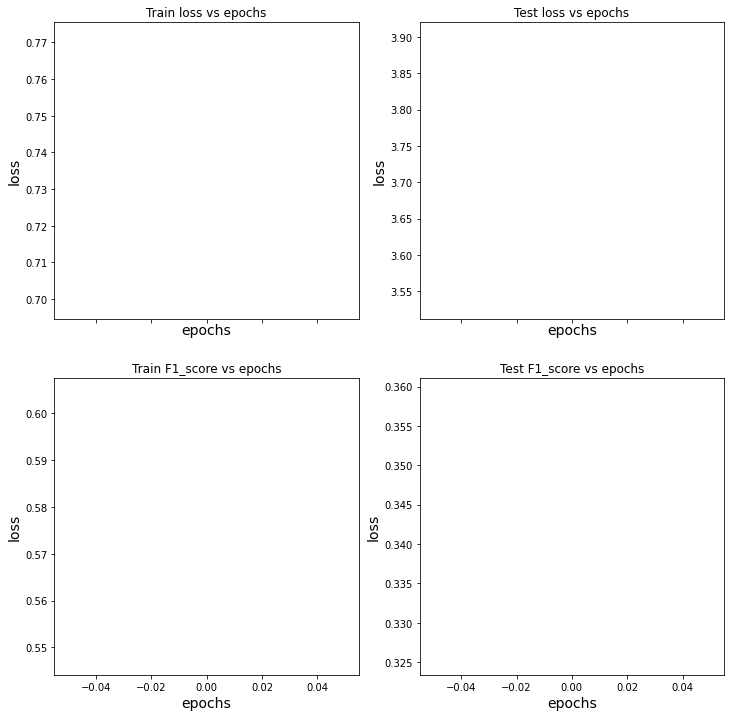

In [12]:
model_wrapper_bce_6_128_1.draw_metrics()